In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
    import numpy as np
    import matplotlib.pyplot as plt

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# import geolocate_code as geol
import math

%matplotlib inline

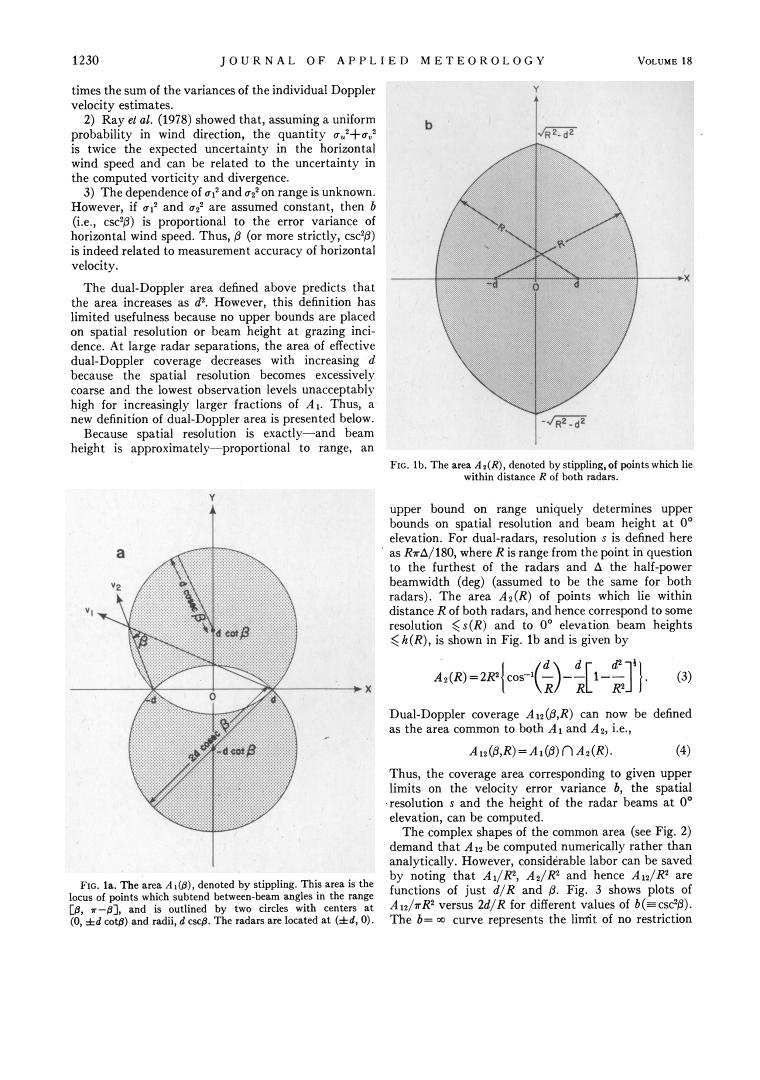

In [25]:
#following Davies-Jones 1979, we can calculate the radius of the dual-Doppler lobes.
#R = 2d*csc(beta)
d = 20.  ## Here, d is 1/2 the distance between the radars
beta = [15,22,30,38,45]  ##This is the beam-crossing angle of interest. Smaller numbers = wider circles. Usually use 30 or 22
R = np.zeros_like(beta)
for i,b in enumerate(beta):
    R[i] = 2*d*(1./np.sin(np.deg2rad(b)))
    
    
#The center of the lobes is calculated as -d * cot (beta). Let's calcualte for 30º. That's R[2]
neg_rad = -d*(1/np.tan(np.deg2rad(beta[2])))
pos_rad = d*(1/np.tan(np.deg2rad(beta[2])))


print(R)
print(neg_rad)
print(pos_rad)

[154 106  80  64  56]
-34.64101615137755
34.64101615137755


In [7]:

#This function calculates the poitns of a circle
def points_in_circle_np(radius, x0=0, y0=0, ):
    degs = np.deg2rad(np.arange(0,361, 0.5))
    x = np.sin(degs)*radius+x0
    y = np.cos(degs)*radius+y0
    
    return x,y
    


In [8]:
#Normally I would read the x, y from the gridded file. but we can just set something up for
#demonstration.

x= np.arange(-101,101,1)
y= np.arange(-101,101,1)

X,Y = np.meshgrid(x,y)

In [9]:

#Find the points of the 2 dual-Doppler lobes. This is easy because we have them centered along the x axis.
#points_in_circle_np takes the radius, which we calculated above, and the centers of the cirlcles, which we also calculated above.
xcir1, ycir1 = points_in_circle_np(R[2]/2, x0=0, y0=neg_rad, )
xcir2, ycir2 = points_in_circle_np(R[2]/2, x0=0, y0=pos_rad, )

#Now things get crazy. We calculate a Polygon with everythign inside circle 1
lons_lats_vect1 = np.column_stack((xcir1, ycir1)) # Reshape coordinates
polygon1 = Polygon(lons_lats_vect1) # create polygon

#We also create a polygon with all the poitns in circle 2
lons_lats_vect2 = np.column_stack((xcir2, ycir2)) # Reshape coordinates
polygon2 = Polygon(lons_lats_vect2) # create polygon


#Now what I decided to do was create a 'mask' which would tell us if we are in a lobe, in the
#cross-over area, or outside. Here 'mask' shoudl be the size of the grid/radar domain. In
#my case, it is 2D (201,201)

#So this will loop through and determine if each grid point is in the circle, and if so add 1.
#If it is in both circles, it will add 1 and 1, so mask will end up as 2.

#then you can use mask1 to find points with values 1 (the DD lobes) or 2 (the baseline).


mask1=np.zeros_like(X)

for i, t in enumerate(Y[:,0]):
    for j,n in enumerate(X[0,:]):
        point = Point(X[i,j],Y[i,j]) # create point
        if polygon1.contains(point) == True:
            mask1[i,j]=mask1[i,j]+1
        if polygon2.contains(point) == True:
            mask1[i,j]=mask1[i,j]+1



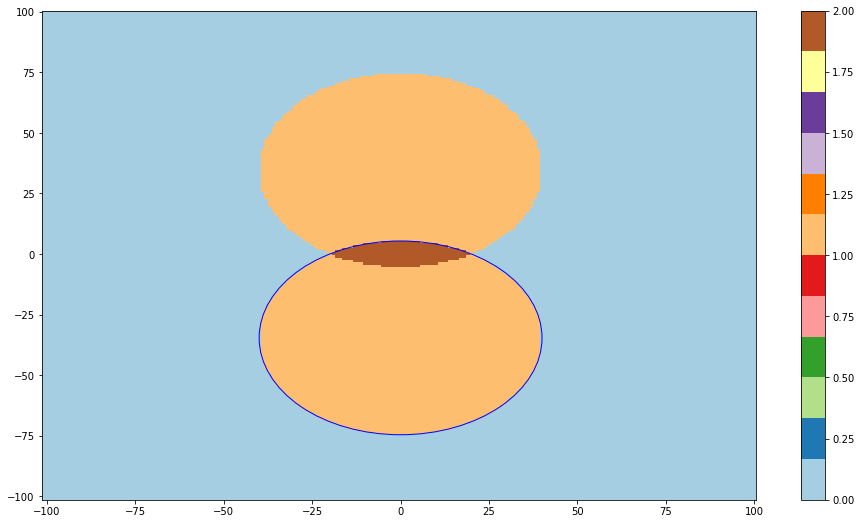

In [26]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

c =plt.pcolormesh(X,Y,mask1,vmin=0,vmax=2,cmap='Paired')
plt.colorbar(c)
circle1 = plt.Circle((0,neg_rad), R[2]/2, color='b',fill=False)
# circle2 = plt.Circle((0,pos_rad), R[2]/2, color='b',fill=False)

# circle3 = plt.Circle((0,neg_rad), R[1]/2, color='b',fill=False)
# circle4 = plt.Circle((0,-1*neg_rad), R[1]/2, color='b',fill=False)


# circle5 = plt.Circle((0,neg_rad), R[0]/2, color='b',fill=False)
# circle6 = plt.Circle((0,-1*neg_rad), R[0]/2, color='b',fill=False)


ax.add_patch(circle1)
# ax.add_patch(circle2)
# ax.add_patch(circle3)
# ax.add_patch(circle4)

# ax.add_patch(circle5)
# ax.add_patch(circle6)
# plt.savefig('Dual_doppler_check_area.png',dpi=300,bbox_inches='tight')

